In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from datetime import datetime
from tqdm import tqdm

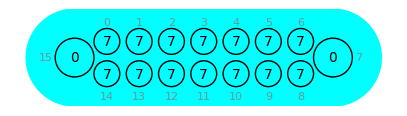

In [4]:
def reset_board():
    board = np.ones((16))*7
    board[7] = 0
    board[15] = 0
    return board

def display_board(board):
    # Create a figure and axis and define size
    fig, ax = plt.subplots(figsize=(5,2))
    
    # draw Board
    colour = 'cyan'
    c = plt.Rectangle((1,0),8,3, color=colour)
    ax.add_artist(c)
    c = plt.Circle((1,1.5),1.5, color=colour)
    ax.add_artist(c)
    c = plt.Circle((9,1.5),1.5, color=colour)
    ax.add_artist(c)
    
    # Hole 0
    c  = plt.Circle((1,1.5),0.6, color='black', fill=False)
    ax.add_artist(c)
    
    # Hole 8
    c  = plt.Circle((9,1.5),0.6, color='black', fill=False)
    ax.add_artist(c)
    
    # Holes 1-7
    for i in range(1,8):
        c  = plt.Circle((1+i,2),0.4, color='black', fill=False)
        ax.add_artist(c)
        c  = plt.Circle((1+i,1),0.4, color='black', fill=False)
        ax.add_artist(c)
        
    # Plot board values
    for i in range(16):
        if i ==15 or i == 7:
            plt.text(9 - (i//8)*8,1.5,str(int(board[i])),color='black', ha='center', va='center')
            plt.text(9.8 - (i//8)*9.7,1.5,str(i),color='red', ha='center', va='center', fontsize=8, alpha=0.4)
        elif i < 7:
            plt.text(2 + i,2,str(int(board[i])),color='black', ha='center', va='center')
            plt.text(2 + i,2.6,str(i),color='red', ha='center', va='center', fontsize=8, alpha=0.4)
        elif i > 7:
             plt.text(16- i ,1,str(int(board[i])),color='black', ha='center', va='center')
             plt.text(16 - i,0.3,str(i),color='red', ha='center', va='center', fontsize=8, alpha=0.4)   
            

    plt.xlim(-1,11)
    plt.ylim(0,3)
    plt.axis('off')
    ax.set_aspect('equal')
    plt.show()

def move_board(board, h, player):
    # Move h stones from hole h
    stones = board[h]
    board[h] = 0
    i = h
    while stones > 0:
        
        #display(board)
        # Calculate Hole:
        i += 1
        if (player == 0) and (i == 15):
            i+=1
        elif (player == 1) and (i == 7):
            i+=1
            
        i = i%16
        
        # add Stone
        board[i] += 1
        stones -= 1
        
        # Check final hole:
        if (stones == 0):
            
            if (player == 0) and (i == 7):
                next_player = 0
                return board, next_player
            elif (player == 1) and (i == 15):
                next_player = 1
                return board, next_player
            elif  (board[i] > 1): #  End in occupied hole
                stones = board[i]
                board[i] = 0
            elif (board[i] == 1):
                if (player == 0) and (i < 7):
                    board[7] += board[14-i] + 1
                    board[14-i] = 0
                    board[i] = 0
                elif (player == 1) and (i > 7):
                    board[15] += board[14-i] + 1
                    board[14-i] = 0
                    board[i] = 0

                next_player = (player + 1)%2
                return board, next_player
            
def calculate_score(board):
    return board[7] - board[15]

def game_over(board):
    return (np.sum(board[:7]) + np.sum(board[8:15])) == 0

def generate_moves(board, player):
    if player == 0:
        return [i for i in range(7) if board[i] > 0]
    else:
        return [i for i in range(8, 15) if board[i] > 0]

display_board(reset_board())

In [5]:
# Random Algorithim
def random_algo(board, player):
    start_time = datetime.now()
    moves = generate_moves(board, player)
    move = np.random.choice(moves)
    return move, (datetime.now() - start_time).total_seconds()

In [6]:
# MIN MAX ALGORITHM
def minmax(board, player, depth):
    if game_over(board) or depth == 0:
        return calculate_score(board)
    
    moves = generate_moves(board, player)
    if not moves:
        return minmax(board, 1 - player, depth)

    if player == 0:
        best_score = -np.inf
        for move in moves:
            new_board, next_player = move_board(board.copy(), move, player)
            score = minmax(new_board, next_player, depth-1)
            best_score = max(best_score, score)
        return best_score
    else:
        best_score = np.inf
        for move in moves:
            new_board, next_player = move_board(board.copy(), move, player)
            score = minmax(new_board, next_player, depth-1)
            best_score = min(best_score, score)
        return best_score
    
def best_move_minmax(board, player, depth):
    start_time = datetime.now()
    best_score = -np.inf if player == 0 else np.inf
    best_move = None
    for move in generate_moves(board, player):
        new_board = board.copy()
        new_board, next_player = move_board(new_board, move, player)
        score = minmax(new_board, next_player, depth-1)
        if player == 0 and score > best_score:
            best_score = score
            best_move = move
        elif player == 1 and score < best_score:
            best_score = score
            best_move = move
    #print(f"Best Move: {best_move}, Score: {best_score}")
    return best_move, (datetime.now() - start_time).total_seconds()


Games Progress (Depth=1): 100%|██████████| 3/3 [00:00<00:00, 401.23it/s]


Games Progress (Depth=3): 100%|██████████| 3/3 [00:00<00:00, 13.57it/s]


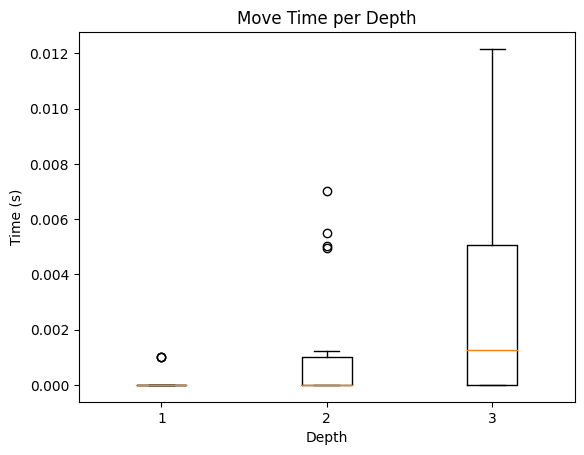

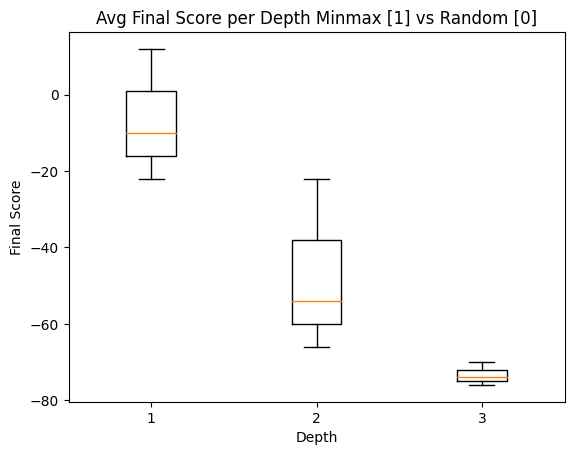

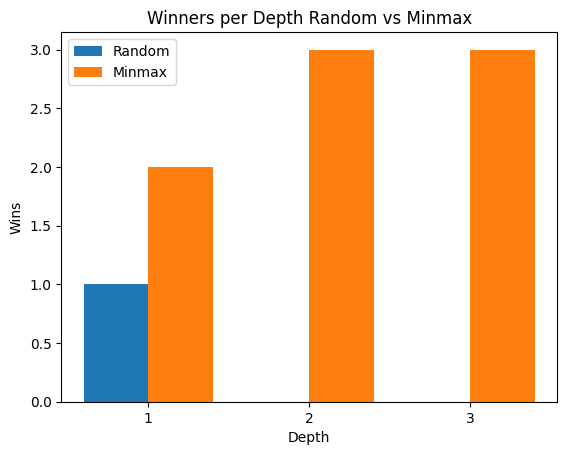

In [7]:
#GAME LOOP RANDOM VS MINMAX

def game_loop_random_vs_minmax(depth):
    board = reset_board()
    player =  np.random.randint(2)
    r = 0
    player_0_time = []
    player_1_time = []
    final_score = 0
    #print('Starting Game with Player:', player)
    while not game_over(board):
        if len(generate_moves(board, player)) == 0:
            player = 1-player
            continue
        r += 1
        if player == 0:
            m, t = random_algo(board.copy(), player)
            player_0_time.append(t)
        elif player == 1:
            m, t = best_move_minmax(board.copy(), player, depth)
            player_1_time.append(t)
        board, player = move_board(board,m,player)
    final_score = calculate_score(board)

    return final_score, player_0_time, player_1_time
# ANALYSIS Random vs Minmax

depths = [1,2,3]
minmax_time_per_depth = []
winners_per_depth = []
scores_per_depth = []

for depth in depths:
    
    minmax_time = []
    winners = []
    scores = []
    
    for i in tqdm(range(3), desc=f"Games Progress (Depth={depth})", leave=True):
        final_score, player_random_time, player_minmax_time = game_loop_random_vs_minmax(depth)
        
        minmax_time += player_minmax_time
        scores.append(final_score)
        winners.append(0 if final_score > 0 else 1)
        
    minmax_time_per_depth.append(minmax_time)
    winners_per_depth.append(winners)
    scores_per_depth.append(scores)
    


# Plotting time per depth
plt.figure()
plt.boxplot(minmax_time_per_depth)
plt.xticks(range(1,len(depths)+1),depths)
plt.xlabel('Depth')
plt.ylabel('Time (s)')
plt.title('Move Time per Depth')
plt.show()

# Plotting Average Score per depth
plt.figure()
plt.boxplot(scores_per_depth)
plt.xticks(range(1,len(depths)+1),depths)
plt.xlabel('Depth')
plt.ylabel('Final Score')
plt.title('Avg Final Score per Depth Minmax [1] vs Random [0]')

# Plotting Winners per depth multiple bar plot
plt.figure()
bar_random = [np.sum([1 for i in winners if i == 0]) for winners in winners_per_depth]
bar_minmax = [np.sum([1 for i in winners if i == 1]) for winners in winners_per_depth]
plt.bar(np.array(depths)-0.2, bar_random, width=0.4, label='Random')
plt.bar(np.array(depths)+0.2, bar_minmax, width=0.4, label='Minmax')
plt.xticks(depths)
plt.xlabel('Depth')
plt.ylabel('Wins')
plt.title('Winners per Depth Random vs Minmax')
plt.legend()
plt.show()  # Show the plot

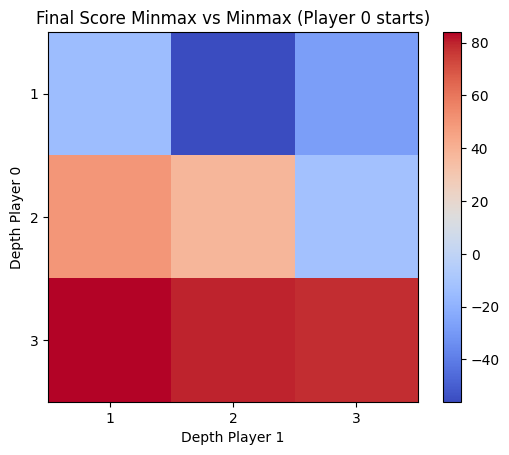

In [8]:
# GAME LOOP MINMAX vs MINMAX different depths

def game_loop_minmax_vs_minmax_diff_depths(depth_0, depth_1):
    board = reset_board()
    player =  0
    r = 0
    player_0_time = []
    player_1_time = []
    final_score = 0
    #print('Starting Game with Player:', player)
    while not game_over(board):
        if len(generate_moves(board, player)) == 0:
            player = 1-player
            continue
        
        r += 1
        if player == 0:
            m, t = best_move_minmax(board.copy(), player, depth_0)
            player_0_time.append(t)
        elif player == 1:
            m, t = best_move_minmax(board.copy(), player, depth_1)
            player_1_time.append(t)
        board, player = move_board(board,m,player)
    final_score = calculate_score(board)

    return final_score, player_0_time, player_1_time

# ANALYSIS Minmax vs Minmax different depths
depths = [1,2,3]

scores = []

for depth_0 in depths:
    scores.append([])
    for depth_1 in depths:
        final_score, player_0_time, player_1_time = game_loop_minmax_vs_minmax_diff_depths(depth_0, depth_1)
        scores[-1].append(final_score)
        
# Plotting scores in a heatmap
plt.figure()
plt.imshow(scores, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(depths)),depths)
plt.yticks(range(len(depths)),depths)
plt.xlabel('Depth Player 1')
plt.ylabel('Depth Player 0')
plt.title('Final Score Minmax vs Minmax (Player 0 starts)')
plt.show()  # Show the plot

In [19]:
# ALPHA BETA PRUNING

def minmax_alpha_beta_pruning(board, player, depth, alpha, beta):
    if game_over(board) or depth == 0:
        return calculate_score(board)
    
    moves = generate_moves(board, player)
    if not moves:
        return minmax(board, 1 - player, depth)

    if player == 0:  # Maximizing player
        best_score = -np.inf
        for move in moves:
            new_board, next_player = move_board(board.copy(), move, player)
            score = minmax_alpha_beta_pruning(new_board, next_player, depth-1, alpha, beta)
            best_score = max(best_score, score)
            alpha = max(alpha, score)
            if beta <= alpha:
                break  # Beta cut-off
        return best_score
    else:  # Minimizing player
        best_score = np.inf
        for move in moves:
            new_board, next_player = move_board(board.copy(), move, player)
            score = minmax_alpha_beta_pruning(new_board, next_player, depth-1, alpha, beta)
            best_score = min(best_score, score)
            beta = min(beta, score)
            if beta <= alpha:
                break  # Alpha cut-off
        return best_score

def best_move_minmax_alpha_beta_pruning(board, player, depth):
    start_time = datetime.now()
    best_score = -np.inf if player == 0 else np.inf
    best_move = None
    alpha = -np.inf
    beta = np.inf

    for move in generate_moves(board, player):
        new_board = board.copy()
        new_board, next_player = move_board(new_board, move, player)
        score = minmax_alpha_beta_pruning(new_board, next_player, depth-1, alpha, beta)
        if player == 0 and score > best_score:
            best_score = score
            best_move = move
        elif player == 1 and score < best_score:
            best_score = score
            best_move = move

    return best_move, (datetime.now() - start_time).total_seconds()

Games Progress (Depth=3): 100%|██████████| 100/100 [00:08<00:00, 11.32it/s]


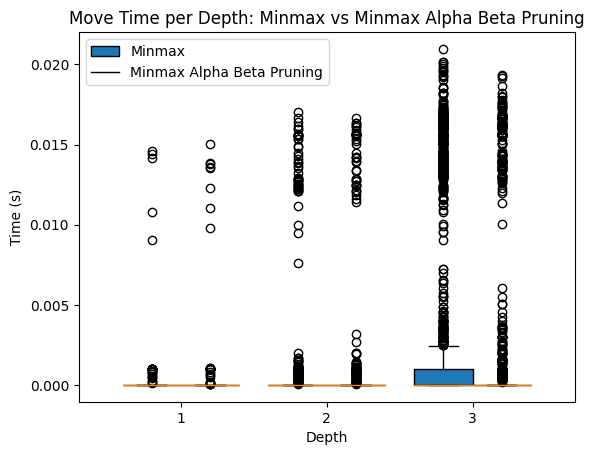

[[6.0, -26.0, 2.0, -12.0, -28.0, -26.0, -6.0, -34.0, -32.0, -2.0, -36.0, -28.0, -26.0, -14.0, -54.0, -38.0, -36.0, -36.0, 16.0, -10.0, -22.0, -18.0, -10.0, 2.0, -42.0, -8.0, -28.0, -16.0, -50.0, -12.0, 4.0, -44.0, -6.0, -36.0, -24.0, -18.0, -20.0, -16.0, 0.0, -48.0, -10.0, -10.0, -30.0, -14.0, -20.0, -12.0, -32.0, -6.0, -26.0, -36.0, -46.0, -42.0, -52.0, -30.0, -22.0, -22.0, -46.0, -28.0, 4.0, -6.0, -20.0, -14.0, -14.0, 10.0, -6.0, -6.0, -46.0, -10.0, -10.0, -20.0, -18.0, -42.0, -8.0, -20.0, -38.0, -36.0, -52.0, 10.0, -32.0, -14.0, -16.0, -34.0, -36.0, -18.0, -36.0, -24.0, -38.0, -16.0, -34.0, -30.0, -26.0, -18.0, -2.0, -26.0, -6.0, -6.0, -16.0, -28.0, -52.0, -20.0], [-44.0, -50.0, -54.0, -66.0, -54.0, -80.0, -32.0, -48.0, -46.0, -64.0, -30.0, -54.0, -24.0, -58.0, -62.0, -38.0, -56.0, -52.0, -26.0, -36.0, -34.0, -54.0, -56.0, -52.0, -52.0, -58.0, -40.0, -66.0, -48.0, -58.0, -58.0, -50.0, -50.0, -40.0, -52.0, -60.0, -22.0, -44.0, -52.0, -32.0, -44.0, -72.0, -54.0, -66.0, -64.0, -54.0, -

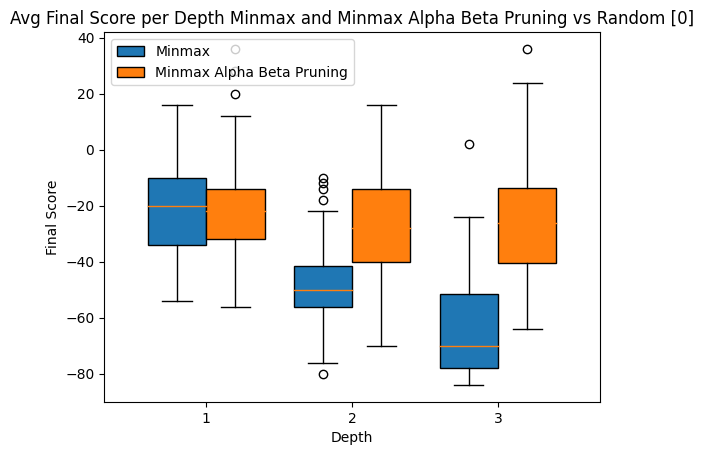

In [20]:



# GAME LOOP RANDOM VS MINMAX ALPHA BETA PRUNING

def game_loop_random_vs_minmax_alpha_beta_pruning(depth):
    
    board = reset_board()
    player =  np.random.randint(2)
    r = 0
    player_0_time = []
    player_1_time = []
    final_score = 0
    #print('Starting Game with Player:', player)
    while not game_over(board):
        if len(generate_moves(board, player)) == 0:
            player = 1-player
            continue

        r += 1
        if player == 0:
            m, t = random_algo(board.copy(), player)
            player_0_time.append(t)
        elif player == 1:
            m, t = best_move_minmax_alpha_beta_pruning(board.copy(), player, depth)
            player_1_time.append(t)
        board, player = move_board(board,m,player)
    final_score = calculate_score(board)

    return final_score, player_0_time, player_1_time

# ANALYSIS Minmax vs Minmax Alpha Beta Pruning time per depth

depths = [1,2,3]
minmax_alpha_beta_pruning_time_per_depth = []
minmax_time_per_depth = []

minmax_alpha_beta_pruning_score_per_depth = []
minmax_score_per_depth = []

for depth in depths:    
    
    minmax_alpha_beta_pruning_time = []
    minmax_time = []
    
    minmax_alpha_beta_pruning_score = []
    minmax_score = []
    
    for i in tqdm(range(100), desc=f"Games Progress (Depth={depth})", leave=True):
        final_score, player_random_time, player_minmax_time = game_loop_random_vs_minmax_alpha_beta_pruning(depth)
        minmax_alpha_beta_pruning_time += player_minmax_time
        minmax_alpha_beta_pruning_score.append(final_score)
        
        final_score, player_random_time, player_minmax_time = game_loop_random_vs_minmax(depth)
        minmax_time += player_minmax_time
        minmax_score.append(final_score)
        
    minmax_alpha_beta_pruning_time_per_depth.append(minmax_alpha_beta_pruning_time)
    minmax_time_per_depth.append(minmax_time)
    
    minmax_alpha_beta_pruning_score_per_depth.append(minmax_alpha_beta_pruning_score)
    minmax_score_per_depth.append(minmax_score)

# Plotting time per depth double boxplot
plt.figure()
positions_1 = [i - 0.2 for i in range(1, len(depths) + 1)]
positions_2 = [i + 0.2 for i in range(1, len(depths) + 1)]
plt.boxplot(minmax_time_per_depth, positions=positions_1, widths=0.4, patch_artist=True, boxprops=dict(facecolor="C0"))
plt.boxplot(minmax_alpha_beta_pruning_time_per_depth, positions=positions_2, widths=0.4, patch_artist=True, boxprops=dict(facecolor="C1"))
plt.xticks(range(1, len(depths) + 1), depths)
plt.xlabel('Depth')
plt.ylabel('Time (s)')
plt.title('Move Time per Depth: Minmax vs Minmax Alpha Beta Pruning')
plt.legend(['Minmax', 'Minmax Alpha Beta Pruning'], loc='upper left')
plt.show()

# Plotting Average Score per depth double boxplot
print(minmax_score_per_depth)
print(minmax_alpha_beta_pruning_score_per_depth)
plt.figure()
positions_1 = [i - 0.2 for i in range(1, len(depths) + 1)]
positions_2 = [i + 0.2 for i in range(1, len(depths) + 1)]
bp1 = plt.boxplot(minmax_score_per_depth, positions=positions_1, widths=0.4, patch_artist=True, boxprops=dict(facecolor="C0"))
bp2 = plt.boxplot(minmax_alpha_beta_pruning_score_per_depth, positions=positions_2, widths=0.4, patch_artist=True, boxprops=dict(facecolor="C1"))
plt.xticks(range(1, len(depths) + 1), depths)
plt.xlabel('Depth')
plt.ylabel('Final Score')
plt.title('Avg Final Score per Depth Minmax and Minmax Alpha Beta Pruning vs Random [0]')
plt.legend([bp1["boxes"][0], bp2["boxes"][0]], ['Minmax', 'Minmax Alpha Beta Pruning'], loc='upper left')
plt.show()


Depth_0=5: 100%|██████████| 5/5 [00:01<00:00,  3.56it/s]


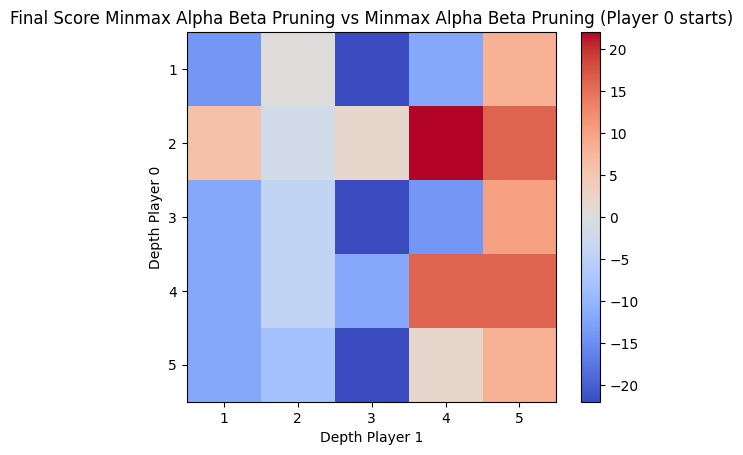

In [21]:
# GAME LOOP MINMAX  ALPHA BETA PRUNING VS MINMAX ALPHA BETA PRUNING DIFFERENT DEPTHS
def game_loop_random_vs_minmax_alpha_beta_pruning_diffrent_depths(depth_0,depth_1):
    board = reset_board()
    player =  0
    r = 0
    player_0_time = []
    player_1_time = []
    final_score = 0
    #print('Starting Game with Player:', player)
    while not game_over(board):
        if len(generate_moves(board, player)) == 0:
            player = 1-player
            continue

        r += 1
        if player == 0:
            m, t = best_move_minmax_alpha_beta_pruning(board.copy(), player, depth_0)
            player_0_time.append(t)
        elif player == 1:
            m, t = best_move_minmax_alpha_beta_pruning(board.copy(), player, depth_1)
            player_1_time.append(t)
        board, player = move_board(board,m,player)
    final_score = calculate_score(board)

    return final_score, player_0_time, player_1_time

# ANALYSIS Minmax Alpha Beta Pruning vs Minmax Alpha Beta Pruning different depths

depths = [1,2,3,4,5]
scores = []

for depth_0 in depths:
    scores.append([])
    # Loop over all depths for player 1 in progress bar
    for depth_1 in tqdm(depths, desc=f"Depth_0={depth_0}", leave=True):
        final_score, player_0_time, player_1_time = game_loop_random_vs_minmax_alpha_beta_pruning_diffrent_depths(depth_0, depth_1)
        scores[-1].append(final_score)
        
# Plotting scores in a heatmap
plt.figure()
plt.imshow(scores, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(depths)),depths)
plt.yticks(range(len(depths)),depths)
plt.xlabel('Depth Player 1')
plt.ylabel('Depth Player 0')
plt.title('Final Score Minmax Alpha Beta Pruning vs Minmax Alpha Beta Pruning (Player 0 starts)')
plt.show()  # Show the plot


In [16]:
# Transposition table for memoization
transposition_table = {}

def hash_board(board):
    """ Efficient hash function for the board state excluding specific indices. """
    # Exclude indices 7 and 15
    filtered_board = np.delete(board, [7, 15])
    return hash(filtered_board.tobytes())

def minmax_alpha_beta_pruning_hash(board, player, depth, alpha, beta):
    # Check for game over or depth limit
    if game_over(board) or depth == 0:
        return calculate_score(board)
    
    # Hash the board to check the transposition table
    board_hash = hash_board(board)
    if board_hash in transposition_table:
        return transposition_table[board_hash]
    
    moves = generate_moves(board, player)
    if not moves:
        return minmax(board, 1 - player, depth)
    
    if player == 0:  # Maximizing player
        best_score = -np.inf
        for move in moves:
            new_board, next_player = move_board(board.copy(), move, player)
            score = minmax_alpha_beta_pruning_hash(new_board, next_player, depth-1, alpha, beta)
            best_score = max(best_score, score)
            alpha = max(alpha, score)
            if beta <= alpha:
                break  # Beta cut-off
    else:  # Minimizing player
        best_score = np.inf
        for move in moves:
            new_board, next_player = move_board(board.copy(), move, player)
            score = minmax_alpha_beta_pruning_hash(new_board, next_player, depth-1, alpha, beta)
            best_score = min(best_score, score)
            beta = min(beta, score)
            if beta <= alpha:
                break  # Alpha cut-off
    
    # Store the result in the transposition table
    transposition_table[board_hash] = best_score
    return best_score

def best_move_minmax_alpha_beta_pruning_hash(board, player, depth):
    start_time = datetime.now()
    best_score = -np.inf if player == 0 else np.inf
    best_move = None
    alpha = -np.inf
    beta = np.inf

    for move in generate_moves(board, player):
        new_board = board.copy()
        new_board, next_player = move_board(new_board, move, player)
        score = minmax_alpha_beta_pruning_hash(new_board, next_player, depth-1, alpha, beta)
        if player == 0 and score > best_score:
            best_score = score
            best_move = move
        elif player == 1 and score < best_score:
            best_score = score
            best_move = move

    return best_move, (datetime.now() - start_time).total_seconds()


Games Progress (Depth=4): 100%|██████████| 20/20 [00:14<00:00,  1.37it/s]


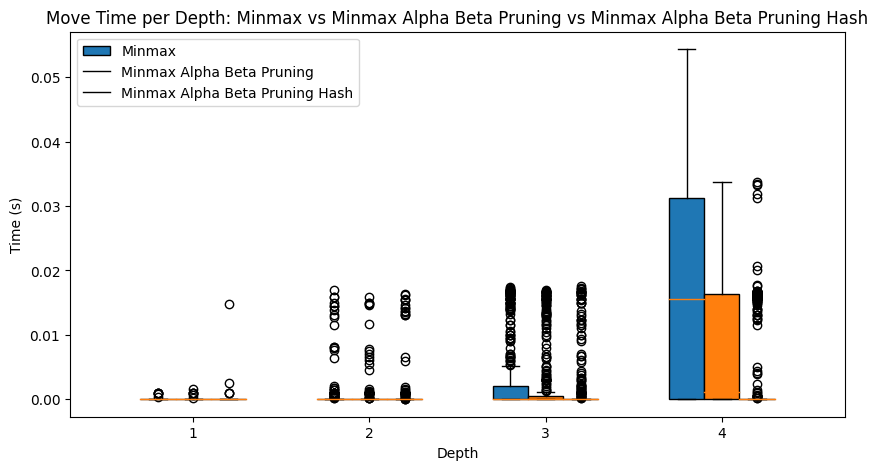

In [17]:
# GAME LOOP RANDOM VS MINMAX ALPHA BETA PRUNING HASH

def game_loop_random_vs_minmax_alpha_beta_pruning_hash(depth):
    board = reset_board()
    player =  np.random.randint(2)
    r = 0
    player_0_time = []
    player_1_time = []
    final_score = 0
    #print('Starting Game with Player:', player)
    while not game_over(board):
        if len(generate_moves(board, player)) == 0:
            player = 1-player
            continue

        r += 1
        if player == 0:
            m, t = random_algo(board.copy(), player)
            player_0_time.append(t)
        elif player == 1:
            m, t = best_move_minmax_alpha_beta_pruning_hash(board.copy(), player, depth)
            player_1_time.append(t)
        board, player = move_board(board,m,player)
    final_score = calculate_score(board)

    return final_score, player_0_time, player_1_time

# ANALYSIS Minmax vs Minmax Alpha Beta Pruning Hash time per depth

depths = [1,2,3,4]

minmax_alpha_beta_pruning_hash_time_per_depth = []
minmax_alpha_beta_pruning_time_per_depth = []
minmax_time_per_depth = []

for depth in depths:
    
    minmax_alpha_beta_pruning_hash_time = []
    minmax_alpha_beta_pruning_time = []
    minmax_time = []
    
    for i in tqdm(range(20), desc=f"Games Progress (Depth={depth})", leave=True):
        global transposition_table # Reset the transposition table
        transposition_table = {}
        
        final_score, player_random_time, player_minmax_time = game_loop_random_vs_minmax_alpha_beta_pruning_hash(depth)
        minmax_alpha_beta_pruning_hash_time += player_minmax_time
        
        final_score, player_random_time, player_minmax_time = game_loop_random_vs_minmax_alpha_beta_pruning(depth)
        minmax_alpha_beta_pruning_time += player_minmax_time
        
        final_score, player_random_time, player_minmax_time = game_loop_random_vs_minmax(depth)
        minmax_time += player_minmax_time
        
    minmax_alpha_beta_pruning_hash_time_per_depth.append(minmax_alpha_beta_pruning_hash_time)
    minmax_alpha_beta_pruning_time_per_depth.append(minmax_alpha_beta_pruning_time)
    minmax_time_per_depth.append(minmax_time)
    
# Plotting time per depth triple boxplot
plt.figure(figsize=(10, 5))
positions_1 = [i - 0.2 for i in range(1, len(depths) + 1)]
positions_2 = [i for i in range(1, len(depths) + 1)]
positions_3 = [i + 0.2 for i in range(1, len(depths) + 1)]
plt.boxplot(minmax_time_per_depth, positions=positions_1, widths=0.2, patch_artist=True, boxprops=dict(facecolor="C0"))
plt.boxplot(minmax_alpha_beta_pruning_time_per_depth, positions=positions_2, widths=0.2, patch_artist=True, boxprops=dict(facecolor="C1"))
plt.boxplot(minmax_alpha_beta_pruning_hash_time_per_depth, positions=positions_3, widths=0.2, patch_artist=True, boxprops=dict(facecolor="C2"))
plt.xticks(range(1, len(depths) + 1), depths)
plt.xlabel('Depth')
plt.ylabel('Time (s)')
plt.title('Move Time per Depth: Minmax vs Minmax Alpha Beta Pruning vs Minmax Alpha Beta Pruning Hash')
plt.legend(['Minmax', 'Minmax Alpha Beta Pruning', 'Minmax Alpha Beta Pruning Hash'], loc='upper left')
plt.show()


In [14]:
# REINFROCEMENT LEARNING


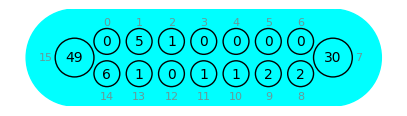

Player: 1 Move: 9


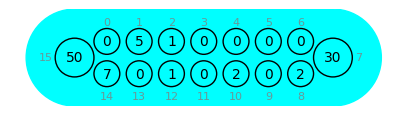

Player: 1 Move: 12


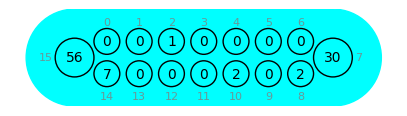

In [15]:
# GAME LOOP MINMAX  ALPHA BETA PRUNING VS USER INPUT

board = reset_board()
board[:]= [0,5,1,0,0,0,0,30,2,2,1,1,0,1,6,49]
display_board(board)
player = 1
depth = 5
m, t = best_move_minmax_alpha_beta_pruning(board.copy(), player, depth)


while player == 1:
    m, t = best_move_minmax_alpha_beta_pruning(board.copy(), player, depth)
    print('Player:', player, 'Move:', m)
    board, player = move_board(board,m,player)
    display_board(board)

